In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import pandas as pd
import pathlib
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

In [21]:
digits = pd.read_csv('D:/Lambton AIMT/Term 3/Capstone Project/digits.csv')


In [22]:
digits.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,255,255,255,255,255,255,255,253,254,254,...,255,255,255,255,255,255,255,255,255,4
1,255,255,255,255,255,255,255,255,255,255,...,255,255,254,60,255,255,255,255,255,1
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,1
3,255,255,255,255,255,255,253,255,254,255,...,255,255,255,255,255,255,255,255,255,6
4,255,255,255,255,255,255,254,254,254,254,...,226,59,255,254,253,255,255,255,255,4


839
type:: <class 'numpy.ndarray'>


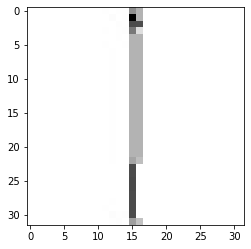

In [23]:
sampleindex = np.random.randint(0,1025)
print(sampleindex)
sample = np.array(digits.iloc[sampleindex, :-1])
sample = sample.reshape(32, 32)
sample = ((sample.astype(float)))
print("type::", type(sample))
plt.imshow(sample, cmap='gray')
plt.show()

In [24]:
X = digits.drop('label', axis=1)
y = digits['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Model training with SVM

In [25]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [26]:
y_pred = classifier.predict(X_test)


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1722    0    0    0    0    0    0    0    0    0]
 [   0 6654    3    0    3    0    0    0    0    0]
 [   2    8 6517    0    3    0    0    3    0    0]
 [   2    0    0 2617    0    6    0    0    3    3]
 [   0    0    0    0 1863    0    0    0    0    0]
 [   0    3    0    3    0  886    6    0    0    0]
 [   0    0    0    0    0    0  740    0    0    0]
 [   0    0    0    0    3    0    0  759    3    0]
 [   0    0    6    0    0    0    0    0  775    3]
 [   0    0    0    0    0    0    0    0    0  969]]


0.9973265436028008

type:: <class 'numpy.ndarray'>


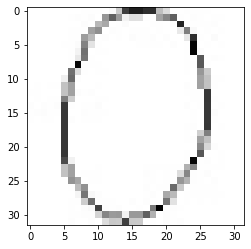

In [28]:
sampleindex = 8965
sample = np.array(digits.iloc[sampleindex, :-1])
sample = sample.reshape(32, 32)
sample = ((sample.astype(float)))
print("type::", type(sample))
plt.imshow(sample, cmap='gray')
plt.show()

[7]
type:: <class 'numpy.ndarray'>


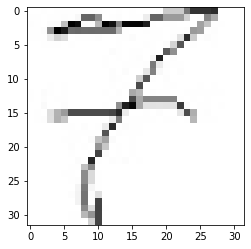

In [29]:
sampleindex = 153
array_to_predict = [list(np.array(X_train.iloc[sampleindex, :]))]

array_to_predict = array_to_predict
predicted = classifier.predict(array_to_predict)
print(predicted)

sample = np.array(X_train.iloc[sampleindex, :])
sample = sample.reshape(32, 32)
sample = ((sample.astype(float)))
print("type::", type(sample))
plt.imshow(sample, cmap='gray')
plt.show()

In [30]:
import pickle
pickle.dump(classifier, open("D:/Lambton AIMT/Term 3/Capstone Project/Saved model/digits.sav", 'wb'))


In [31]:
np.array(X_test.iloc[0, :])

array([255, 255, 255, ..., 255, 255, 255], dtype=int64)

## RNN

In [32]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 25)

Epoch 1/25
2210/2210 [==============================] - 10s 3ms/step - loss: -23343676.0000 - accuracy: 0.2809
Epoch 2/25
2210/2210 [==============================] - 7s 3ms/step - loss: -244994336.0000 - accuracy: 0.2809
Epoch 3/25
2210/2210 [==============================] - 6s 3ms/step - loss: -820921344.0000 - accuracy: 0.2809A: 1s - los
Epoch 4/25
2210/2210 [==============================] - 6s 3ms/step - loss: -1836619904.0000 - accuracy: 0.2809
Epoch 5/25
2210/2210 [==============================] - 5s 2ms/step - loss: -3365409536.0000 - accuracy: 0.2809
Epoch 6/25
2210/2210 [==============================] - 5s 2ms/step - loss: -5507042816.0000 - accuracy: 0.2809
Epoch 7/25
2210/2210 [==============================] - 5s 2ms/step - loss: -8342037504.0000 - accuracy: 0.2809
Epoch 8/25
2210/2210 [==============================] - 5s 2ms/step - loss: -11939551232.0000 - accuracy: 0.2809
Epoch 9/25
2210/2210 [==============================] - 5s 2ms/step - loss: -16396758016.0000 -

In [33]:
sampleindex = 15388
array_to_predict = [(np.array(X_test.iloc[sampleindex, :])).astype(float)]
print(array_to_predict)
predicted = ann.predict(X_test.iloc[sampleindex, :])
print(predicted)

sample = np.array(X_test.iloc[sampleindex, :-1].reshape(-1,1369*0))6902  vfr
sample = sample.reshape(32, 32)
sample = ((sample.astype(float)))
print("type::", type(sample))
plt.imshow(sample, cmap='gray')
plt.show()


SyntaxError: invalid syntax (<ipython-input-33-5ac6fd9bdac6>, line 7)

In [ ]:
X_train.iloc[sampleindex, :].shape

In [ ]:
greek_symb = pd.read_csv('D:/Lambton AIMT/Term 3/Capstone Project/greek_symb.csv')
math_symbols = pd.read_csv('D:/Lambton AIMT/Term 3/Capstone Project/math_symbols.csv')
frames = [digits, greek_symb, math_symbols]

In [ ]:
math_frame = pd.concat(frames)


In [43]:
print(math_frame.shape)
print(type(math_frame.iloc[236903,-2]))
math_frame.head()

(236906, 1025)
<class 'numpy.int64'>


,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,255,255,255,255,255,255,255,253,254,254,...,255,255,255,255,255,255,255,255,255,4
1,255,255,255,255,255,255,255,255,255,255,...,255,255,254,60,255,255,255,255,255,1
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,1
3,255,255,255,255,255,255,253,255,254,255,...,255,255,255,255,255,255,255,255,255,6
4,255,255,255,255,255,255,254,254,254,254,...,226,59,255,254,253,255,255,255,255,4


In [44]:
math_frame = math_frame.astype(float)
pd.to_save("D:/Lambton AIMT/Term 3/Capstone Project/all_math_symb.csv")

ValueError: could not convert string to float: 'alpha'

In [3]:
math_symbols = pd.read_csv('D:/Lambton AIMT/Term 3/Capstone Project/math_symbols.csv')
math_symbols.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,!
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,!
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,!
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,!
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,!


In [4]:
X = math_symbols.drop('label', axis=1)
y = math_symbols['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)